# COGS 108 FA23 A04/A07
## Week 8 Demo: Text
#### This demo is adapted from D7.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

# Import nltk package 
# NLTK provides support for a wide variety of text processing tasks: 
# tokenization, stemming, proper name identification, part of speech identification, etc. 
#   PennTreeBank word tokenizer 
#   English language stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# scikit-learn imports
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# import re for regular expression
import re

## seaborn for plotting
import seaborn as sns
sns.set(font_scale=1.2, style="white")

# import matplotlib for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

# improve resolution
%config InlineBackend.figure_format ='retina'

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('inaugural')

[nltk_data] Downloading package punkt to /Users/jasonc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasonc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/jasonc/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

Now let's **import the `inaugural` dataset from `nltk.corpus`.**

In [3]:
from nltk.corpus import inaugural

You should be able to see all the txt files in the dataset, but here we just want to display the first 5 files:

In [4]:
inaugural.fileids()[0:5]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt']

Let's then extract the years for each speech and save the years in a list called `years`.

In [5]:
years = []
for fileid in inaugural.fileids():
    years.append(fileid[:4])

Let's check if we have successfully extracted the years:

In [6]:
years[0:5]

['1789', '1793', '1797', '1801', '1805']

Let's take a look at one of the files:

In [7]:
# see Washington's Second Inaugural Address
inaugural.raw('1793-Washington.txt')

'Fellow citizens, I am again called upon by the voice of my country to execute the functions of its Chief Magistrate. When the occasion proper for it shall arrive, I shall endeavor to express the high sense I entertain of this distinguished honor, and of the confidence which has been reposed in me by the people of united America.\n\nPrevious to the execution of any official act of the President the Constitution requires an oath of office. This oath I am now about to take, and in your presence: That if it shall be found during my administration of the Government I have in any instance violated willingly or knowingly the injunctions thereof, I may (besides incurring constitutional punishment) be subject to the upbraidings of all who are now witnesses of the present solemn ceremony.\n\n \n'

You'll notice that there are some new line characters, as well as a colon, some commas, some periods. We're really only interested in the words though for TF-IDF, so let's remove all punctuation. **Write code that returns a list (`text`), where each element in the list includes the text as above, but with:
- punctuation removed 
- each word separated by a space
- all words are lower case (i.e. "Constitution" should be "constitution)

Here's a cheatsheet for regular expression: https://cheatography.com/davechild/cheat-sheets/regular-expressions/

In [8]:
# This code processes a collection of inaugural address texts from the NLTK's 'inaugural' corpus.
# 1. `[inaugural.raw(file) for file in inaugural.fileids()]`: This list comprehension iterates over
#    each file identifier in the inaugural corpus. For each file identifier, it retrieves the raw text
#    of the corresponding inaugural address using the `inaugural.raw(file)` method.
# 2. `[re.sub(r'[^A-Za-z0-9]+', ' ', x) for x in ...]`: Another list comprehension that processes
#    each text (referred to as 'x') from the previous step. It uses the `re.sub` function to replace
#    any sequence of characters not (caret, ^) in the set of upper and lower case letters (A-Za-z) and digits (0-9)
#    with a space. This effectively strips out punctuation and special characters, leaving only alphanumeric
#    characters and spaces.
# 3. The result is a list of cleaned texts from the inaugural addresses, with each text now having only
#    alphanumeric characters and spaces, making them more uniform for further text processing or analysis.

text = [re.sub(r'[^A-Za-z0-9]+', ' ', x) for x in [inaugural.raw(file_id) for file_id in inaugural.fileids()]]

# This code converts each element in the 'text' iterable to lowercase.
# 1. `map(str.lower, text)`: The `map` function applies the `str.lower` method to each item in the `text` iterable.
#    - `str.lower` is a string method that converts all uppercase characters in a string to lowercase.
#    - The `map` function iterates over each element of `text`, applying `str.lower` to each element.
#    - This results in an iterator where each element is the lowercase version of the corresponding 
# element in `text`.
# 2. `list(...)`: The `list` constructor converts the iterator returned by `map` into a list.
#    - This is necessary because `map` returns an iterator, which is not a list, but can be easily 
# converted into one.
# 3. The resulting list, which is assigned back to `text`, now contains the same elements as the 
# original, but all in lowercase.
#    - This is often used in text processing where case-insensitive comparisons or analyses are needed.

text = list(map(str.lower, text))

Note: `re.sub(r'[\W]+', ' ', x)` or `re.sub(r'[^\w]+', ' ', x)` should also work in this case. The onl difference is that these methods will also replace the underscore `'_'` with space.

Now let's take a look at the cleaned data again:

In [9]:
# Print out the cleaned version of text data:
text[1]

'fellow citizens i am again called upon by the voice of my country to execute the functions of its chief magistrate when the occasion proper for it shall arrive i shall endeavor to express the high sense i entertain of this distinguished honor and of the confidence which has been reposed in me by the people of united america previous to the execution of any official act of the president the constitution requires an oath of office this oath i am now about to take and in your presence that if it shall be found during my administration of the government i have in any instance violated willingly or knowingly the injunctions thereof i may besides incurring constitutional punishment be subject to the upbraidings of all who are now witnesses of the present solemn ceremony '

Now, with the data cleaned, let's perform text analysis with TF-IDF!

To get started on your TF-IDF analysis, you'll first want to **create a `TfidfVectorizer` object to transform your text data into vectors. Assign this `TfidfVectorizer` object to `tfidf`.**

In this object, you'll need to **pass five arguments to initialize a `TfidfVectorizer`**: 
* set to apply TF scaling: `sublinear_tf=True`
* analyze at the word-level: `analyzer='word'`
* set maximum number of unique words: ` max_features=2000`
* specify that you want to tokenize the data using the word_tokenizer from NLTK: `tokenizer=word_tokenize`
* remove English language stop words: `stop_words=stopwords.words("english")`

Note: Stop words are a set of commonly used words in a language,which are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so widely used that they carry very little useful information.

In [10]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=2000,
                        tokenizer=word_tokenize,
                        stop_words=stopwords.words("english"))

# Initialize a TfidfVectorizer for converting raw text documents into TF-IDF feature matrix.
# 1. sublinear_tf=True: Apply sublinear TF scaling, i.e., replace term frequency (TF) with 1 + log(TF).
# 2. analyzer='word': Set the feature analyzer to 'word', meaning the features are made of words (as 
# opposed to characters or n-grams).
# 3. max_features=2000: Limit the number of features (i.e., vocabulary size) to the top 2000 terms 
# with the highest term frequency across the corpus.
# 4. tokenizer=word_tokenize: Use the `word_tokenize` function from NLTK as the tokenizer to break 
# text documents into tokens (words).
# 5. stop_words=stopwords.words("english"): Define the stop words to be English words that are commonly 
# filtered out in the preprocessing stage. These are words like 'and', 'the', 'is', etc., provided by 
# the NLTK library.

# The TfidfVectorizer will transform raw text documents into a matrix where each row represents a 
# document and each column represents one of the top 2000 words. The value in each cell is the TF-IDF 
# score, which is a statistical measure used to evaluate the importance of a word to a document in a 
# collection or corpus.

Now, it's time to calculate TF-IDF for words across our corpus of Inaugural addresses! 

To do this:

1. Use the `tfidf.fit_transform` function to calculate TF-IDF on your `text` variable. Use `.toarray()` to transform the output to a numpy array named `tfidf_array`. 
2. Generate a DataFrame `inaug_tfidf` by passing `tfidf_array` into `pd.DataFrame`.
2. Be sure that the columns are named with the columns of the words the values represent and your index in `inaug_tfidf` is the year of the address. The `get_feature_names` method from `tfidf` may help you accomplish the columns name assignment. And the `years` you created earlier may help you with the indices.

In [11]:
# Transform the preprocessed text data into a TF-IDF matrix and convert it to a pandas DataFrame.
# 1. tfidf.fit_transform(text): This line applies the previously initialized TfidfVectorizer to the text data.
#    - 'fit_transform' function computes the TF-IDF scores for each word in the text data.
#    - The result is a sparse matrix where each row corresponds to a document and each column represents 
# a term from the TF-IDF vocabulary.

inaug_tfidf = pd.DataFrame(tfidf.fit_transform(text).toarray())

# 2. Convert the sparse matrix to a dense matrix using '.toarray()', and then into a DataFrame.
#    - The DataFrame 'inaug_tfidf' represents the TF-IDF features of the text data, where each row is 
# a document and each column is a TF-IDF feature.

inaug_tfidf.columns = tfidf.get_feature_names()

# 3. Assign column names to the DataFrame using 'tfidf.get_feature_names()'.
#    - Each column in the DataFrame is named after a term in the TF-IDF vocabulary.

inaug_tfidf.index = years

# 4. Set the DataFrame index using 'years'.
#    - This implies that 'years' is an iterable (probably a list or array) that contains the years 
# associated with each text document.
#    - Each row in the DataFrame is now associated with a specific year, making it easier to reference 
# the documents chronologically.

Let's then take a look at the dataframe we just generated:

In [12]:
inaug_tfidf.head()

,000,abandon,abiding,ability,able,abroad,absolute,abundant,abuses,accept,...,write,written,wrong,year,years,yes,yet,yield,young,zeal
1789,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.025474,0.0,0.000000,0.0,0.0,0.000000
1793,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
1797,0.0,0.000000,0.0,0.0,0.000000,0.033842,0.000000,0.0,0.043945,0.0,...,0.000000,0.000000,0.00000,0.051073,0.041101,0.0,0.000000,0.0,0.0,0.045604
1801,0.0,0.053954,0.0,0.0,0.000000,0.038474,0.051846,0.0,0.084591,0.0,...,0.053954,0.000000,0.06211,0.000000,0.000000,0.0,0.045778,0.0,0.0,0.051846
1805,0.0,0.000000,0.0,0.0,0.036267,0.000000,0.000000,0.0,0.071839,0.0,...,0.000000,0.040981,0.00000,0.049311,0.032016,0.0,0.038877,0.0,0.0,0.092403


Now, let's extract the single most unique word from each address and save it in a variable called `most_unique`

In [13]:
# Find the most uniquely significant word for each document in the TF-IDF matrix.
# 1. inaug_tfidf.idxmax(axis=1): This method is applied to the 'inaug_tfidf' DataFrame.
#    - 'idxmax' function finds the index (column name in this case) of the first occurrence 
# of the maximum value along the specified axis.
#    - 'axis=1' specifies that the operation is to be performed along the columns for each row.
#    - For each row (document) in the DataFrame, 'idxmax' identifies the column (word) that has 
# the highest TF-IDF score.
# 2. The result 'most_unique' is a pandas Series where the index corresponds to the indices of 
# documents in 'inaug_tfidf', 
#    and the values are the names of the words (columns in 'inaug_tfidf') that have the highest 
# TF-IDF score in each document.
#    - Essentially, this series maps each document to the word that is most uniquely significant 
# to that document based on TF-IDF scores.


most_unique = inaug_tfidf.idxmax(axis=1)

In [14]:
most_unique[:5]

1789     article
1793     thereof
1797    virtuous
1801     trusted
1805       false
dtype: object

Now let's plot the TF-IDF value for `"british"`, `"america"`, `"war"`, and `"jobs"` on the y-axis and plot the years on the x-axis.

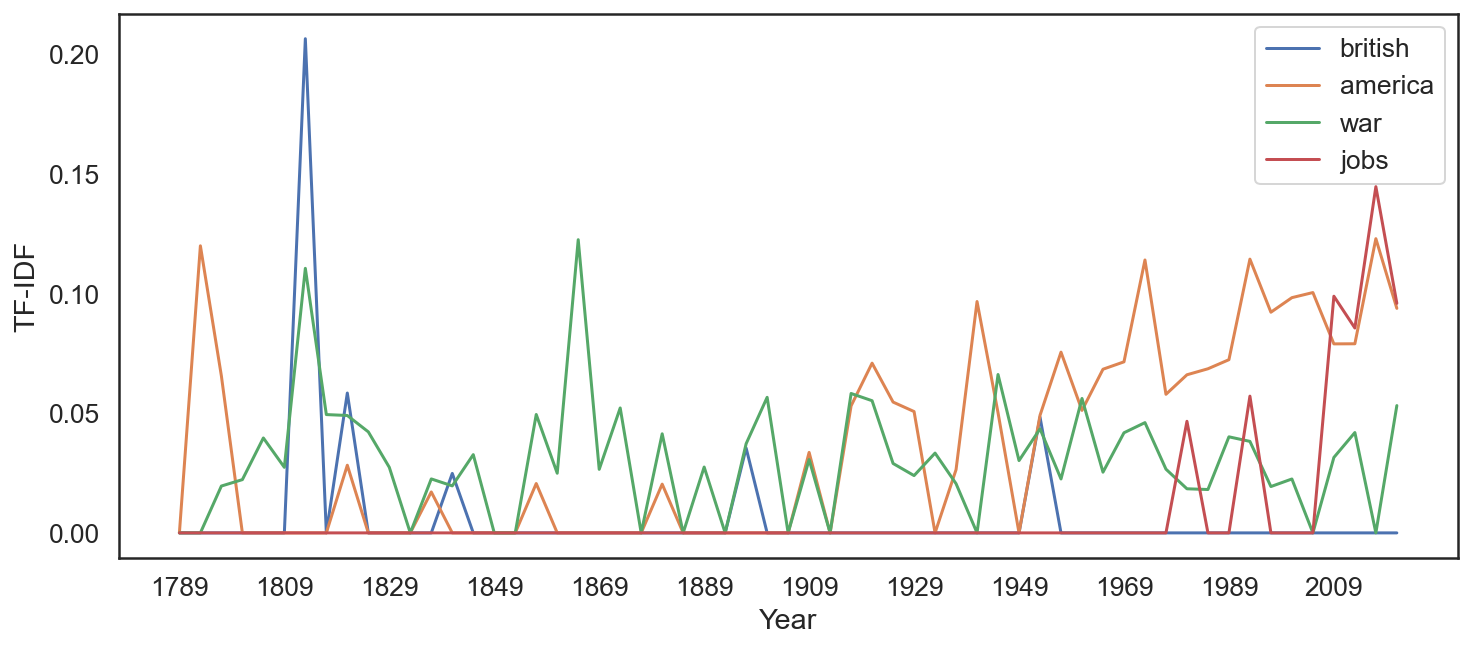

In [15]:
# Plotting TF-IDF scores for specific words across different years.
# 'x' is a list or array representing years corresponding to each document.
x = inaug_tfidf.index

plt.plot(x, inaug_tfidf['british'], label="british")
# Plot the TF-IDF scores of the word "british" across different years.

plt.plot(x, inaug_tfidf['america'], label="america")
# Plot the TF-IDF scores of the word "america" across different years.

plt.plot(x, inaug_tfidf['war'], label="war")
# Plot the TF-IDF scores of the word "war" across different years.

plt.plot(x, inaug_tfidf['jobs'], label="jobs")
# Plot the TF-IDF scores of the word "jobs" across different years.

# Setting the labels for the x and y axes.
plt.xlabel('Year')
plt.ylabel('TF-IDF')

# Adding a legend to the upper right corner of the plot.
plt.legend(loc="upper right")

# Setting the x-axis ticks. np.arange(0, 56, step=5) suggests the range starts at 0, 
# ends before 56, with a step of 5 for better visualization.
plt.xticks(np.arange(0, 56, step=5))

# Display the plot.
plt.show();

What kind of trend can you see from the plot?

Now you should be able to finish D7!